In [9]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [6]:
processed_dataset = load_dataset("EthanGLEdwards/urbansounds_melspectrograms")

Generating train split: 100%|██████████| 8732/8732 [00:02<00:00, 3375.48 examples/s]


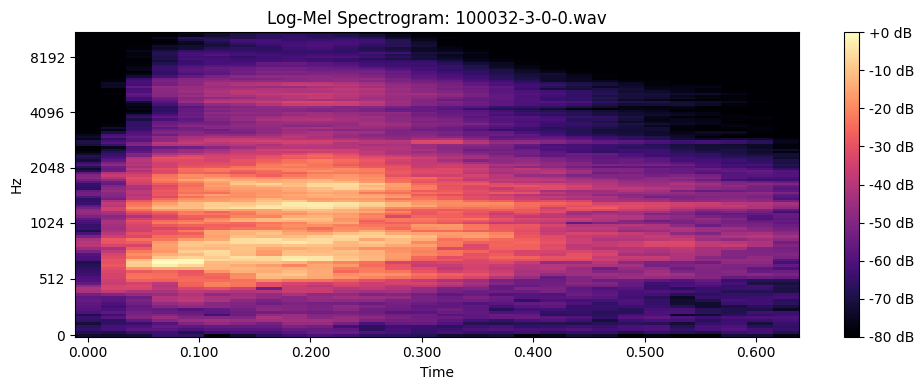

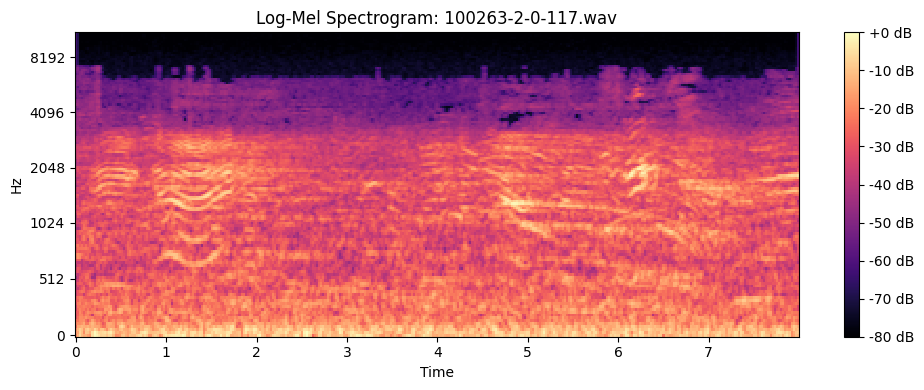

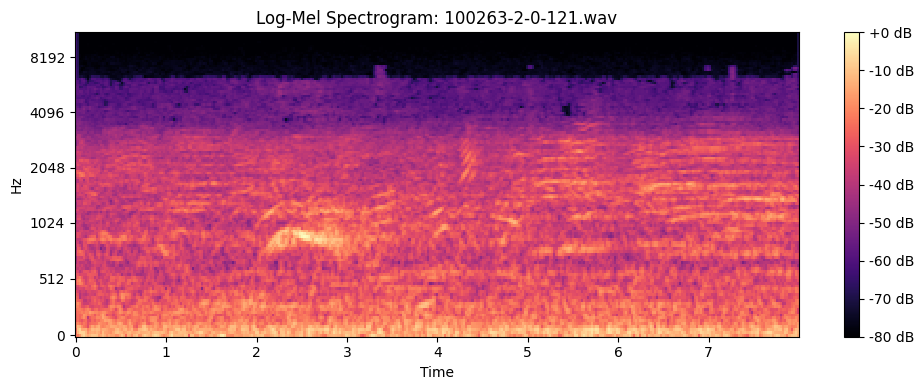

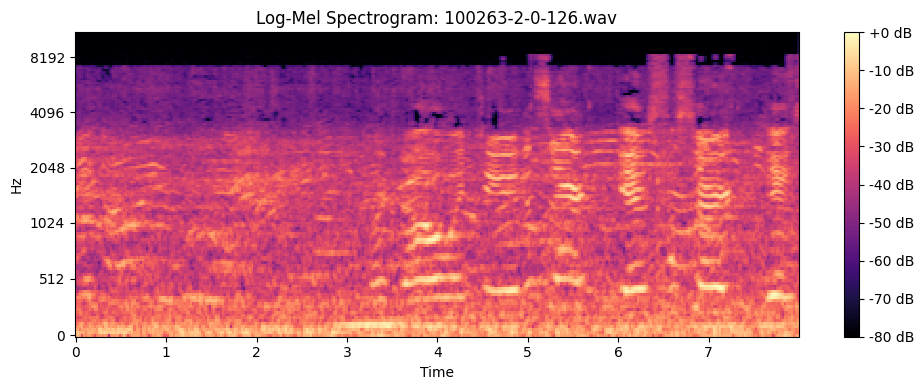

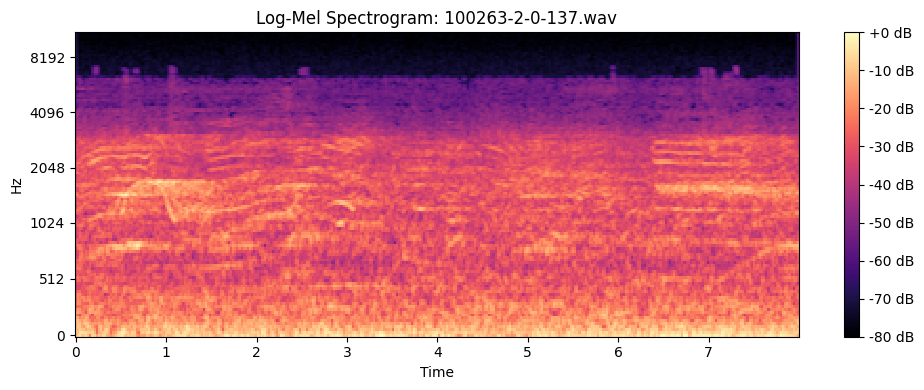

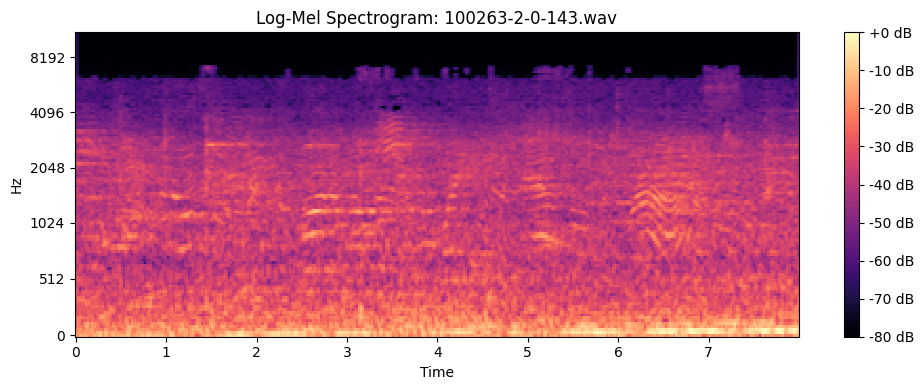

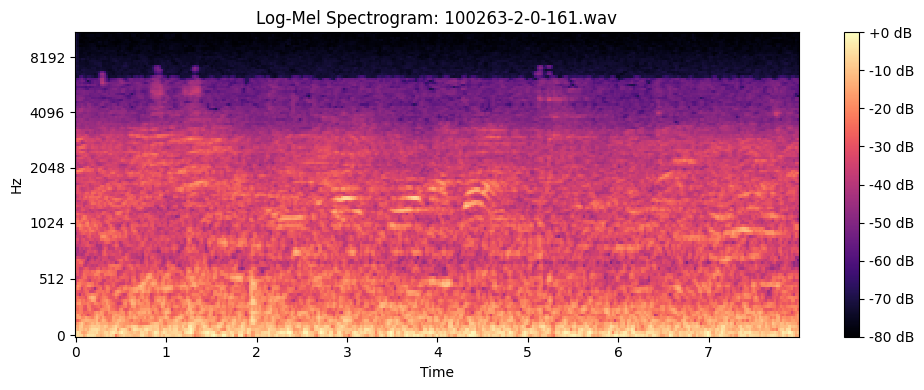

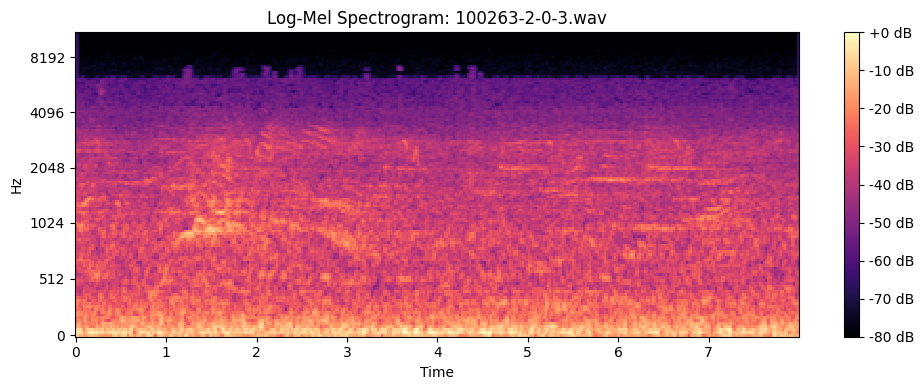

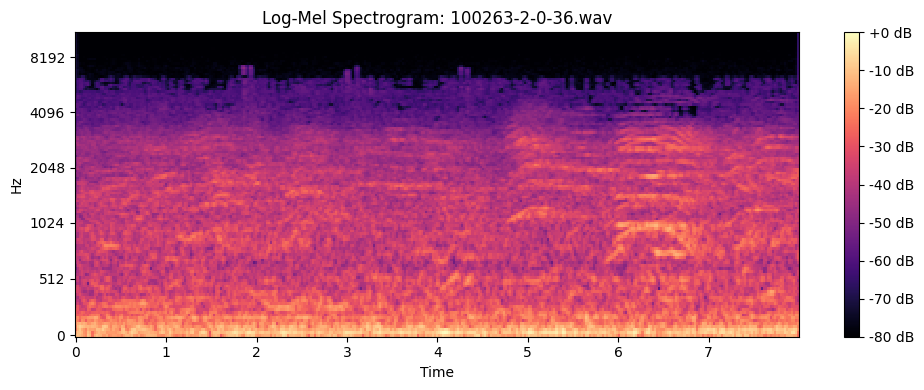

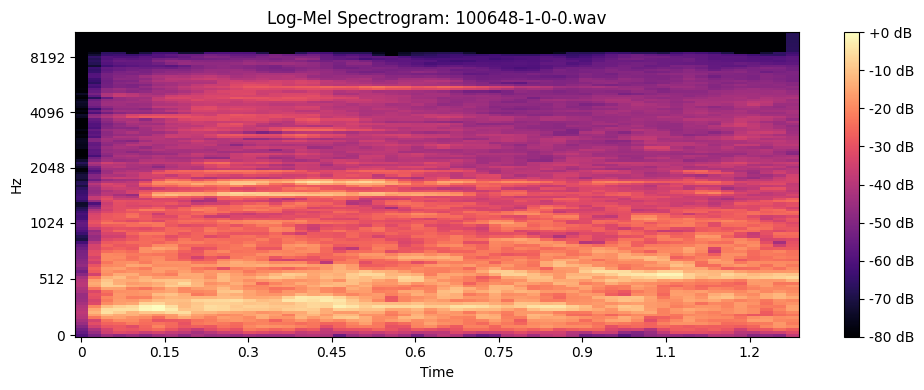

In [10]:
import librosa.display

for i in range(10):
    item = processed_dataset['train'][i]
    log_mel_spectrogram = np.array(item['mel_spectrogram'])  # Convert list back to numpy array
    sampling_rate = 22050  # Replace with actual sampling rate if available in dataset

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        log_mel_spectrogram,
        sr=sampling_rate,
        x_axis='time',
        y_axis='mel'
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Log-Mel Spectrogram: {item['slice_file_name']}")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
# from tqdm import tqdm

# import librosa.display

# # Find the maximum sequence length in the first 10 items
# max_len = max(
#     np.array(processed_dataset['train'][i]['mel_spectrogram']).shape[1]
#     for i in tqdm(range(len(processed_dataset['train'])), desc="Finding max length")
# )
# min_value = np.min([
#     np.min(np.array(processed_dataset['train'][j]['mel_spectrogram']))
#     for j in tqdm(range(len(processed_dataset['train'])), desc="Finding min value")
# ])



Finding max length:   0%|          | 0/8732 [00:00<?, ?it/s]

Finding min value: 100%|██████████| 8732/8732 [01:04<00:00, 135.49it/s]


KeyError: 'mel_spectrogra'

In [16]:
print(max_len)
print(min_value)

1501
-80.0


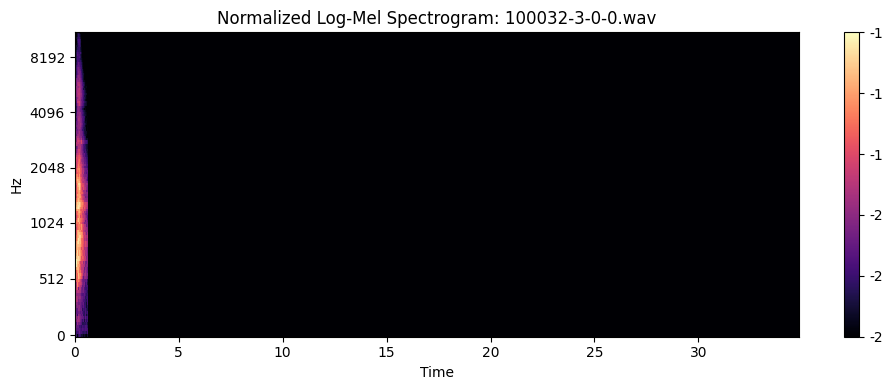

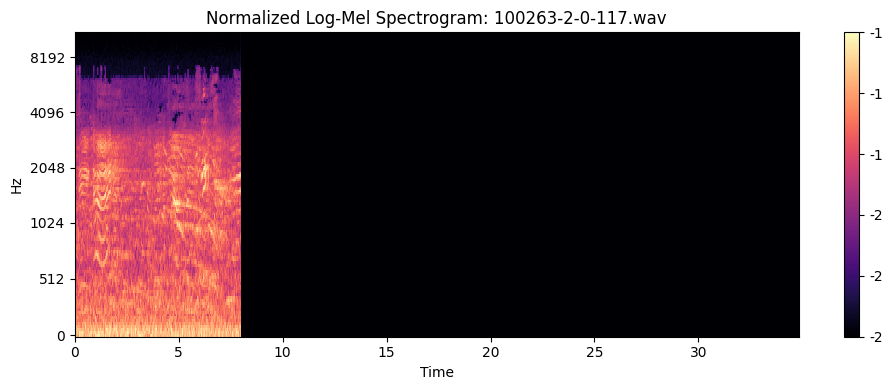

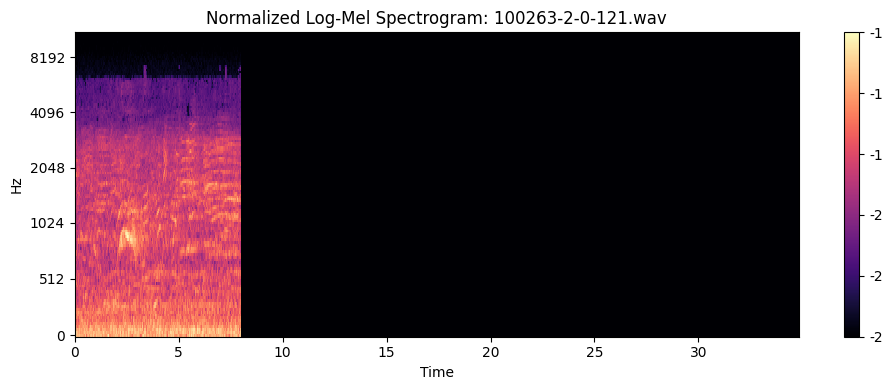

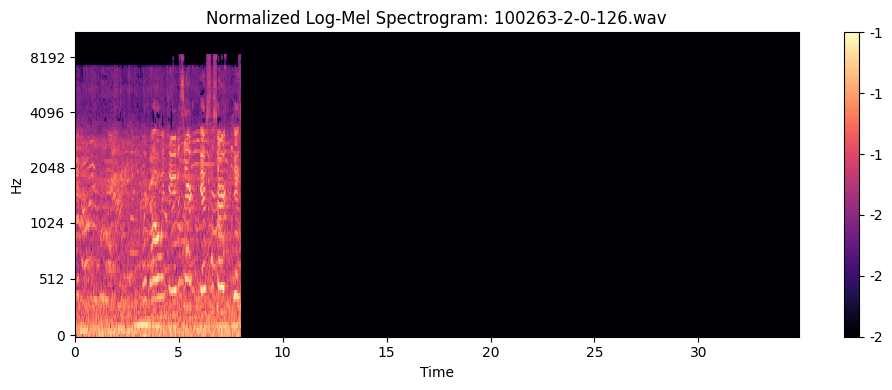

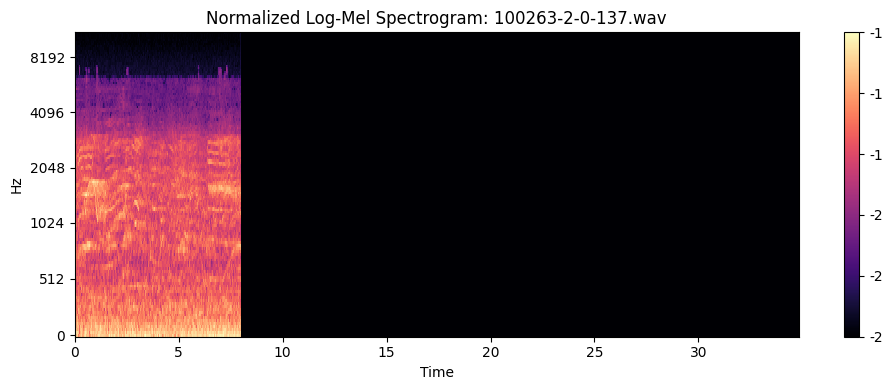

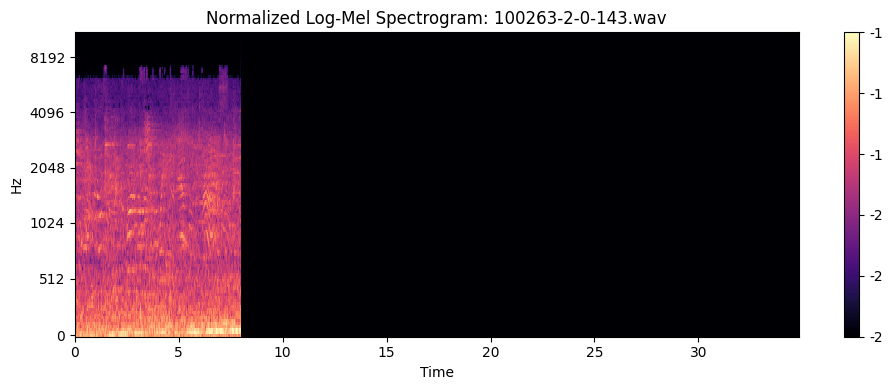

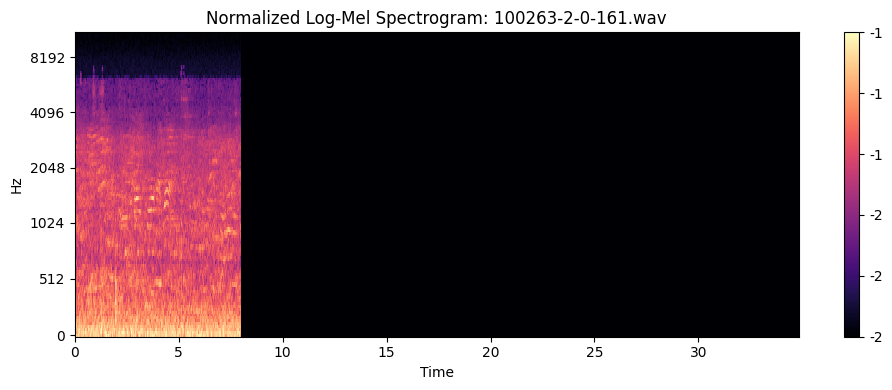

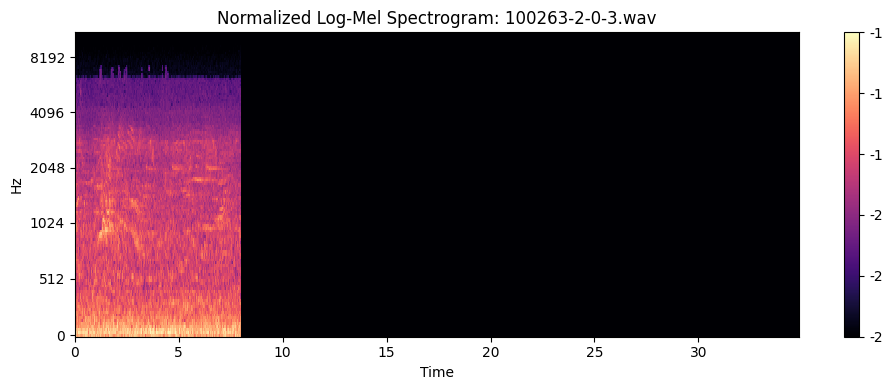

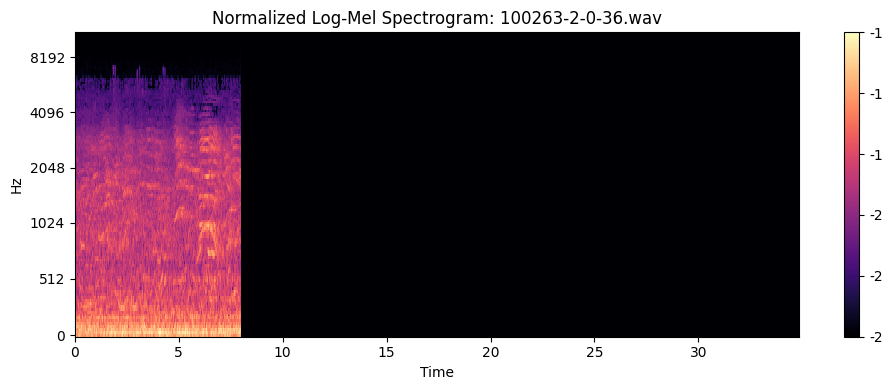

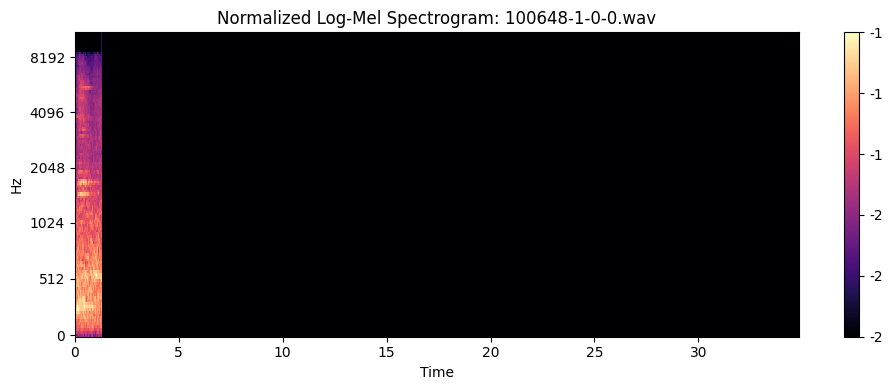

In [21]:
for i in range(10):
    item = processed_dataset['train'][i]
    log_mel_spectrogram = np.array(item['mel_spectrogram'])
    pad_width = max_len - log_mel_spectrogram.shape[1]
    if pad_width > 0:
        log_mel_spectrogram = np.pad(
            log_mel_spectrogram,
            ((0, 0), (0, pad_width)),
            mode='constant',
            constant_values=min_value
        )
    # Normalize to [0, 1]
    min_spec = log_mel_spectrogram.min()
    max_spec = log_mel_spectrogram.max()
    normalized_spectrogram = (log_mel_spectrogram - 80) / (80)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        normalized_spectrogram,
        sr=sampling_rate,
        x_axis='time',
        y_axis='mel'
    )
    plt.colorbar(format='%+2.0f')
    plt.title(f"Normalized Log-Mel Spectrogram: {item['slice_file_name']}")
    plt.tight_layout()
    plt.show()
    plt.close()

In [18]:
# Check the number of frequency bins (y-dimension) in one sample's spectrogram
num_frequency_bins = log_mel_spectrogram.shape[0]
print(f"Number of frequency bins (y-dimension): {num_frequency_bins}")

Number of frequency bins (y-dimension): 128


In [ ]:
for i in range(1):
    item = processed_dataset['train'][i]
    log_mel_spectrogram = np.array(item['mel_spectrogram'])
    pad_width = max_len - log_mel_spectrogram.shape[1]
    if pad_width > 0:
        log_mel_spectrogram = np.pad(
            log_mel_spectrogram,
            ((0, 0), (0, pad_width)),
            mode='constant',
            constant_values=min_value
        )
    # Normalize to [0, 1]

    normalized_spectrogram = (log_mel_spectrogram + 80) / (80)
    print(normalized_spectrogram)

[[0.0914485  0.0873416  0.10009366 ... 0.         0.         0.        ]
 [0.14249056 0.12560132 0.19384354 ... 0.         0.         0.        ]
 [0.18641632 0.22599123 0.2758019  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [28]:
def normalise_and_pad_spectrogram(spectrogram, min_value=-80, max_len=1501):
    """
    Normalise the spectrogram to a range of [0, 1].
    """
    pad_width = max_len - spectrogram.shape[1]
    if pad_width > 0:
        spectrogram = np.pad(
            spectrogram,
            ((0, 0), (0, pad_width)),
            mode='constant',
            constant_values=min_value
        )
    return (spectrogram + 80) / (80)

In [31]:
for i in range(10):
    item = processed_dataset['train'][i]
    log_mel_spectrogram = np.array(item['mel_spectrogram'])
    normalized_spectrogram = normalise_and_pad_spectrogram(log_mel_spectrogram, min_value=min_value, max_len=max_len)
    print(f"Shape of normalized spectrogram for item {i}: {normalized_spectrogram.shape}")

    print(f"Normalized spectrogram for item {i}: {normalized_spectrogram}")    

Shape of normalized spectrogram for item 0: (128, 1501)
Normalized spectrogram for item 0: [[0.0914485  0.0873416  0.10009366 ... 0.         0.         0.        ]
 [0.14249056 0.12560132 0.19384354 ... 0.         0.         0.        ]
 [0.18641632 0.22599123 0.2758019  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Shape of normalized spectrogram for item 1: (128, 1501)
Normalized spectrogram for item 1: [[0.74740774 0.84339268 0.92438502 ... 0.         0.         0.        ]
 [0.79025029 0.81244728 0.91064956 ... 0.         0.         0.        ]
 [0.76628566 0.84832671 0.90036706 ... 0.         0.         0.        ]
 ...
 [0.20759185 0.13529402 0.         ... 0.         0.         0.        ]
 [0.20522813 0.13194362 0.         ... 0.         0.         0.        ]
 [0.